In [2]:
import pytesseract

In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [5]:
#pytesseract.pytesseract.tesseract_cmd = r'** Path to tesseract executable **'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' # To avoid Tesseract Not Found Error.
# We write r before a string to use backslash without using escape sequence.
# pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [6]:
img = cv2.imread('Demo.png') # Reading Image from it's Name. Path should be given if the image is in another folder.

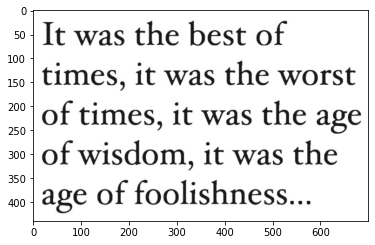

In [7]:
plt.imshow(img) # This displays the image on the output screen without opening a new terminal.

In [8]:
img2char = pytesseract.image_to_string(img) # Extracting Text From Image.

In [9]:
print(img2char) # Printing the Extracted Text.

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



In [10]:
imgbox = pytesseract.image_to_boxes(img)

In [11]:
print(imgbox) # Printing character, x-cod. , y-cod. , width and height of image.

I 21 367 43 415 0
t 46 366 67 403 0
w 85 366 137 397 0
a 138 366 166 398 0
s 170 366 191 398 0
t 213 366 234 403 0
h 237 367 274 417 0
e 277 366 304 398 0
b 325 365 359 418 0
e 365 366 392 398 0
s 382 365 407 418 0
t 398 366 445 403 0
o 467 366 499 398 0
f 504 367 531 417 0
t 19 283 40 320 0
i 44 284 61 331 0
m 64 284 118 315 0
e 103 272 134 331 0
s 121 283 149 315 0
, 155 272 192 315 0
i 215 284 231 331 0
t 234 283 256 320 0
w 273 283 325 314 0
a 326 283 355 315 0
s 358 283 379 315 0
t 401 283 423 320 0
h 426 284 462 334 0
e 465 283 493 315 0
w 511 283 563 314 0
o 563 283 595 315 0
r 599 284 623 315 0
s 626 283 648 315 0
t 652 283 674 320 0
o 19 200 51 232 0
f 57 201 84 251 0
t 97 200 118 237 0
i 122 201 138 248 0
m 142 201 196 233 0
e 181 189 208 248 0
s 199 200 227 232 0
, 232 189 270 232 0
i 292 201 308 248 0
t 312 200 333 237 0
w 351 200 402 231 0
a 404 200 432 232 0
s 436 200 457 232 0
t 479 200 500 237 0
h 504 201 540 251 0
e 543 200 570 232 0
a 593 200 622 232 0
g 622 182 656 2

In [12]:
imgH, imgW, imgD = img.shape # Storing Dimensions of Image.
print(img.shape)

(440, 700, 3)


In [13]:
# The splitlines() function splits srting in 'list' on the basis of line.
for boxes in imgbox.splitlines():
    boxes = boxes.split() # The split() functions splits each line further into single words.
    x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4]) # Storing Dimensions of each 'letter'.
    cv2.rectangle(img, (x,imgH-y), (w,imgH-h), (0,0,225))# Drawing rectange by passing image name, start point, end point, color in BGR.

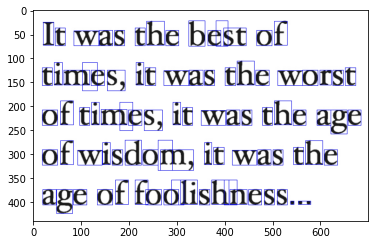

In [14]:
plt.imshow(img) # By Default it is BGR

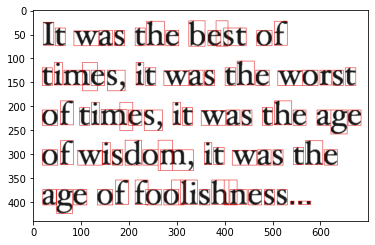

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Converting the given color coordination into RGB from BGR.

In [18]:
cap = cv2.VideoCapture("Video_Demo.mp4") # Reading Image.
#cap = cv2.VideoCapture(0) # Used to access WEBCAM.

if not cap.isOpened():
    cap = cv2.VideoCapture(0) # Tries to open the webcam if the video is not captured.
if not cap.isOpened():
    raise IOError("Can't Open Video") # Throws Inut-Output Device Error.
    
counter = 0 # Counter for Frames.
while cap.isOpened(): # This condition allows to run the loop for the duration of the video.
    ret, frame = cap.read() # ret is a boolean parameter returned by read()
    counter = counter+1
    if(ret==False): # When video is finished then read() returns 'False'.
        break
    if(counter%20==0): # Skipping 20 frames.
        imgH, imgW, imgD = frame.shape # Storing Dimensions of Image.
        imgchar = pytesseract.image_to_string(frame) # Extracting Text from Image.
        imgboxes = pytesseract.image_to_boxes(frame) # Returns the recognized characters and their box boundaries.
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ') # Splits on the basis of ' ' or single-space.
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4]) # Stores the box boundary of a character.
            #cv2.rectangle(frame, (x,imgH-y), (w,imgH-h), (118,114,200))
            cv2.rectangle(frame, (x,imgH-y), (w,imgH-h), (225,192,225)) # Forming Rectangle Around the Characters.
            # Displaying the Recognized Text on the Top of the video.
            cv2.putText(frame, imgchar, (int(imgH/50), int(imgW/50)), cv2.FONT_HERSHEY_COMPLEX, 0.5 , (255,0,0),1)
            cv2.imshow("Text detection Tuotorial", frame) # Displaying Image/ a Frame of the video.
            # The ord('q') returns the unicode of 'q'.
            # The cv2.waitKey(1) returns a 32 bit integer according to the key pressed.
            # When we apply & operation a bitwise calculation is performed and the action taken will depend uopn the returned value.
            if(cv2.waitKey(1) & 0xFF == ord('q')):
                break
                
cap.release() # Release the captured object when the loop terminates.
cv2.destroyAllWindows() # Destroy All Windows.

In [17]:
pass

''' 
Doubt:

1) imagw_to_boxes()
2) rectangle()

'''

' \nDoubt:\n\n1) imagw_to_boxes()\n2) rectangle()\n\n'